In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from sklearn.preprocessing import LabelEncoder

# 載入資料
file_path = r"C:\Users\90607\Downloads\titanic\train.csv"
titanic_data = pd.read_csv(file_path)

titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

# 編碼類別變數
label_encoders = {}
for col in ['Sex', 'Embarked']:
    le = LabelEncoder()
    titanic_data[col] = le.fit_transform(titanic_data[col])
    label_encoders[col] = le

# 選擇特徵
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = titanic_data[features]
y = titanic_data['Survived']

# 分割資料為訓練集與測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

           Model  Train Accuracy  Test Accuracy
0  Decision Tree        0.980738       0.753731
1  Random Forest        0.980738       0.783582
2       AdaBoost        0.861958       0.809701


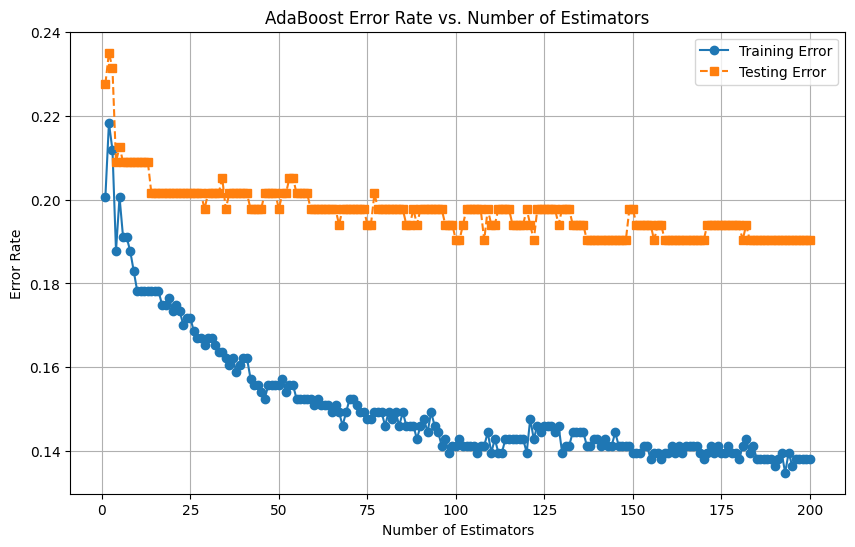

In [ ]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import zero_one_loss

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
train_acc_dt = accuracy_score(y_train, dt.predict(X_train))
test_acc_dt = accuracy_score(y_test, dt.predict(X_test))

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
train_acc_rf = accuracy_score(y_train, rf.predict(X_train))
test_acc_rf = accuracy_score(y_test, rf.predict(X_test))

# AdaBoost
adaboost = AdaBoostClassifier(
    base_estimator=RandomForestClassifier(max_depth=1,n_estimators=100, random_state=42), 
    n_estimators=200, 
    random_state=42)
adaboost.fit(X_train, y_train)
train_acc_adaboost = accuracy_score(y_train, adaboost.predict(X_train))
test_acc_adaboost = accuracy_score(y_test, adaboost.predict(X_test))

results_with_train_test = pd.DataFrame({
    "Model": ["Decision Tree", "Random Forest", "AdaBoost" ],
    "Train Accuracy": [train_acc_dt, train_acc_rf,  train_acc_adaboost],
    "Test Accuracy": [test_acc_dt, test_acc_rf,  test_acc_adaboost]
})
print(results_with_train_test)

train_errors = list(zero_one_loss(y_train, pred) for pred in adaboost.staged_predict(X_train))
test_errors = list(zero_one_loss(y_test, pred) for pred in adaboost.staged_predict(X_test))
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_errors) + 1), train_errors, label='Training Error', linestyle='-', marker='o')
plt.plot(range(1, len(test_errors) + 1), test_errors, label='Testing Error', linestyle='--', marker='s')
plt.xlabel('Number of Estimators')
plt.ylabel('Error Rate')
plt.title('AdaBoost Error Rate vs. Number of Estimators')
plt.legend()
plt.grid(True)
plt.show()